In [1]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# LoRA weights ~150 MB
model_path = "/Users/soplwang/Downloads/lzl"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    safety_checker = None,
    requires_safety_checker = False,
).to("mps")
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# pipe.unet.load_attn_procs(model_path)
# pipe.to("mps")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(
    pipe.scheduler.config, use_karras_sigmas=True
)
pipe.load_lora_weights(model_path, weight_name="lzl_lora.safetensors")

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

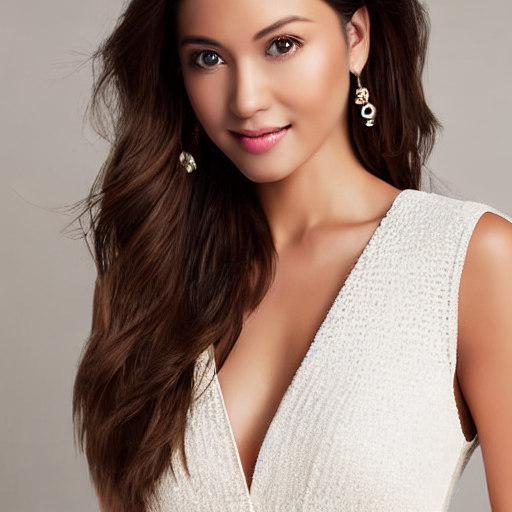

In [2]:
prompt = "linchiling, 1girl, brown hair, grin, jewelry, realistic, white dress,"
negative_prompt = "(worst quality, low quality:1.4), (zombie, sketch, interlocked fingers, comic),"

# First-time "warmup" pass if PyTorch version is 1.13 (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt, num_inference_steps=30, negative_prompt=negative_prompt).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

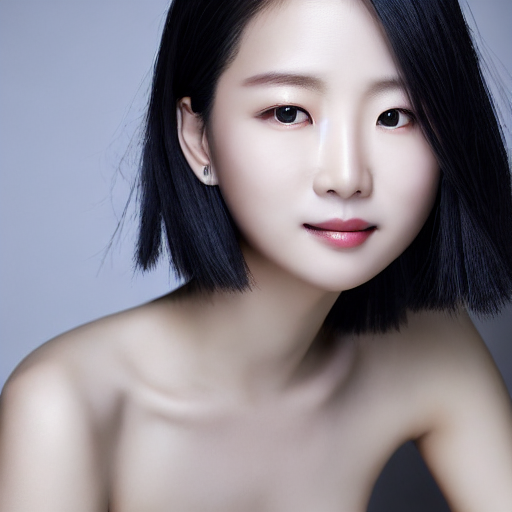

In [6]:
prompt = "linchiling, 1girl, realistic,"
negative_prompt = "(worst quality, low quality:1.4), (zombie, sketch, interlocked fingers, comic),"

# First-time "warmup" pass if PyTorch version is 1.13 (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt, num_inference_steps=30, negative_prompt=negative_prompt).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

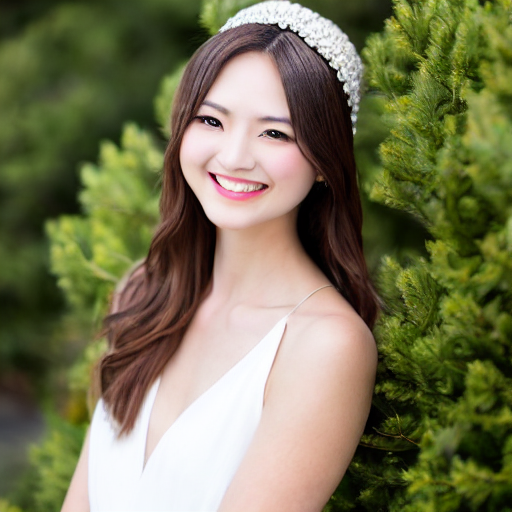

In [5]:
# No LoRA weights

prompt = "linchiling, 1girl, brown hair, grin, jewelry, realistic, white dress,"
negative_prompt = "(worst quality, low quality:1.4), (zombie, sketch, interlocked fingers, comic),"

# First-time "warmup" pass if PyTorch version is 1.13 (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt, num_inference_steps=30, negative_prompt=negative_prompt).images[0]
image